# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤ ML –∏ MLP
## Kaggle Playground Series S4E1: Bank Customer Churn

**–¶–µ–ª—å**: –ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å, —á—Ç–æ –ø–µ—Ä–µ–¥–æ–≤—ã–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã ML (Random Forest, Gradient Boosting, Stacking, Blending) –º–æ–≥—É—Ç —Å–æ—Å—Ç–∞–≤–∏—Ç—å –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—é –ø—Ä–æ—Å—Ç—ã–º –Ω–µ–π—Ä–æ–Ω–Ω—ã–º —Å–µ—Ç—è–º (MLP) –Ω–∞ —Ç–∞–±–ª–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

**–ó–∞–¥–∞—á–∞**: –ü—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –æ—Ç—Ç–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ (–±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è)

**–ú–µ—Ç—Ä–∏–∫–∞**: ROC AUC


In [35]:
# –ò–º–ø–æ—Ä—Ç –æ—Å–Ω–æ–≤–Ω—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


In [36]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è ML
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Gradient Boosting
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# PyTorch –¥–ª—è MLP
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# –î–ª—è —Å—Ç–µ–∫–∏–Ω–≥–∞
from sklearn.ensemble import StackingClassifier

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Å–∏–¥–æ–≤ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
np.random.seed(42)
torch.manual_seed(42)

print("–í—Å–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ —É—Å–ø–µ—à–Ω–æ –∏–º–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã!")


–í—Å–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ —É—Å–ø–µ—à–Ω–æ –∏–º–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã!


In [37]:
## 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö


In [38]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ (–∏—Å–ø–æ–ª—å–∑—É–µ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –≤ —Å—Ç–∏–ª–µ Bank Churn)
# –í —Ä–µ–∞–ª—å–Ω–æ–º —Å–ª—É—á–∞–µ –¥–∞–Ω–Ω—ã–µ —Å–∫–∞—á–∏–≤–∞—é—Ç—Å—è —Å Kaggle

# –°–æ–∑–¥–∞–µ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –¥–∞—Ç–∞—Å–µ—Ç –≤ —Å—Ç–∏–ª–µ Bank Customer Churn
np.random.seed(42)
n_samples = 10000

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏
data = {
    'CustomerId': range(1, n_samples + 1),
    'CreditScore': np.random.normal(650, 100, n_samples).astype(int),
    'Geography': np.random.choice(['France', 'Germany', 'Spain'], n_samples, p=[0.5, 0.25, 0.25]),
    'Gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.55, 0.45]),
    'Age': np.random.randint(18, 92, n_samples),
    'Tenure': np.random.randint(0, 11, n_samples),
    'Balance': np.random.exponential(76000, n_samples),
    'NumOfProducts': np.random.choice([1, 2, 3, 4], n_samples, p=[0.5, 0.45, 0.04, 0.01]),
    'HasCrCard': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    'IsActiveMember': np.random.choice([0, 1], n_samples, p=[0.48, 0.52]),
    'EstimatedSalary': np.random.uniform(0, 200000, n_samples)
}

df = pd.DataFrame(data)

# –°–æ–∑–¥–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –ª–æ–≥–∏—á–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏
churn_prob = (
    0.1 +  # –±–∞–∑–æ–≤–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å
    (df['Age'] > 50) * 0.15 +  # —Å—Ç–∞—Ä—à–∏–π –≤–æ–∑—Ä–∞—Å—Ç
    (df['NumOfProducts'] == 1) * 0.2 +  # –æ–¥–∏–Ω –ø—Ä–æ–¥—É–∫—Ç
    (df['IsActiveMember'] == 0) * 0.25 +  # –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã–π
    (df['Geography'] == 'Germany') * 0.1 +  # –ì–µ—Ä–º–∞–Ω–∏—è
    (df['Balance'] == 0) * 0.3 +  # –Ω—É–ª–µ–≤–æ–π –±–∞–ª–∞–Ω—Å
    (df['CreditScore'] < 500) * 0.2  # –Ω–∏–∑–∫–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥
)

df['Exited'] = np.random.binomial(1, np.clip(churn_prob, 0, 1), n_samples)

print(f"–î–∞—Ç–∞—Å–µ—Ç —Å–æ–∑–¥–∞–Ω: {df.shape}")
print(f"–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞: {df['Exited'].mean():.3f}")
print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
print(df.info())


–î–∞—Ç–∞—Å–µ—Ç —Å–æ–∑–¥–∞–Ω: (10000, 12)
–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞: 0.429

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [39]:
# –ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö
print("–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
print(df.head())

print("\n–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
print(df.describe())


–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:
   CustomerId  CreditScore Geography  Gender  Age  Tenure        Balance  \
0           1          699    France    Male   81       7  151422.821599   
1           2          636    France    Male   32       0   98131.030702   
2           3          714    France  Female   65       1   31770.200513   
3           4          802    France  Female   73       0   32671.343775   
4           5          626   Germany    Male   87       9  141588.452505   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          0               0    118612.903571       0  
1              1          0               0    144598.841249       0  
2              2          1               0    114584.596420       1  
3              2          1               0     20276.023425       0  
4              1          1               0    119678.512404       1  

–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
        CustomerId   CreditScore          

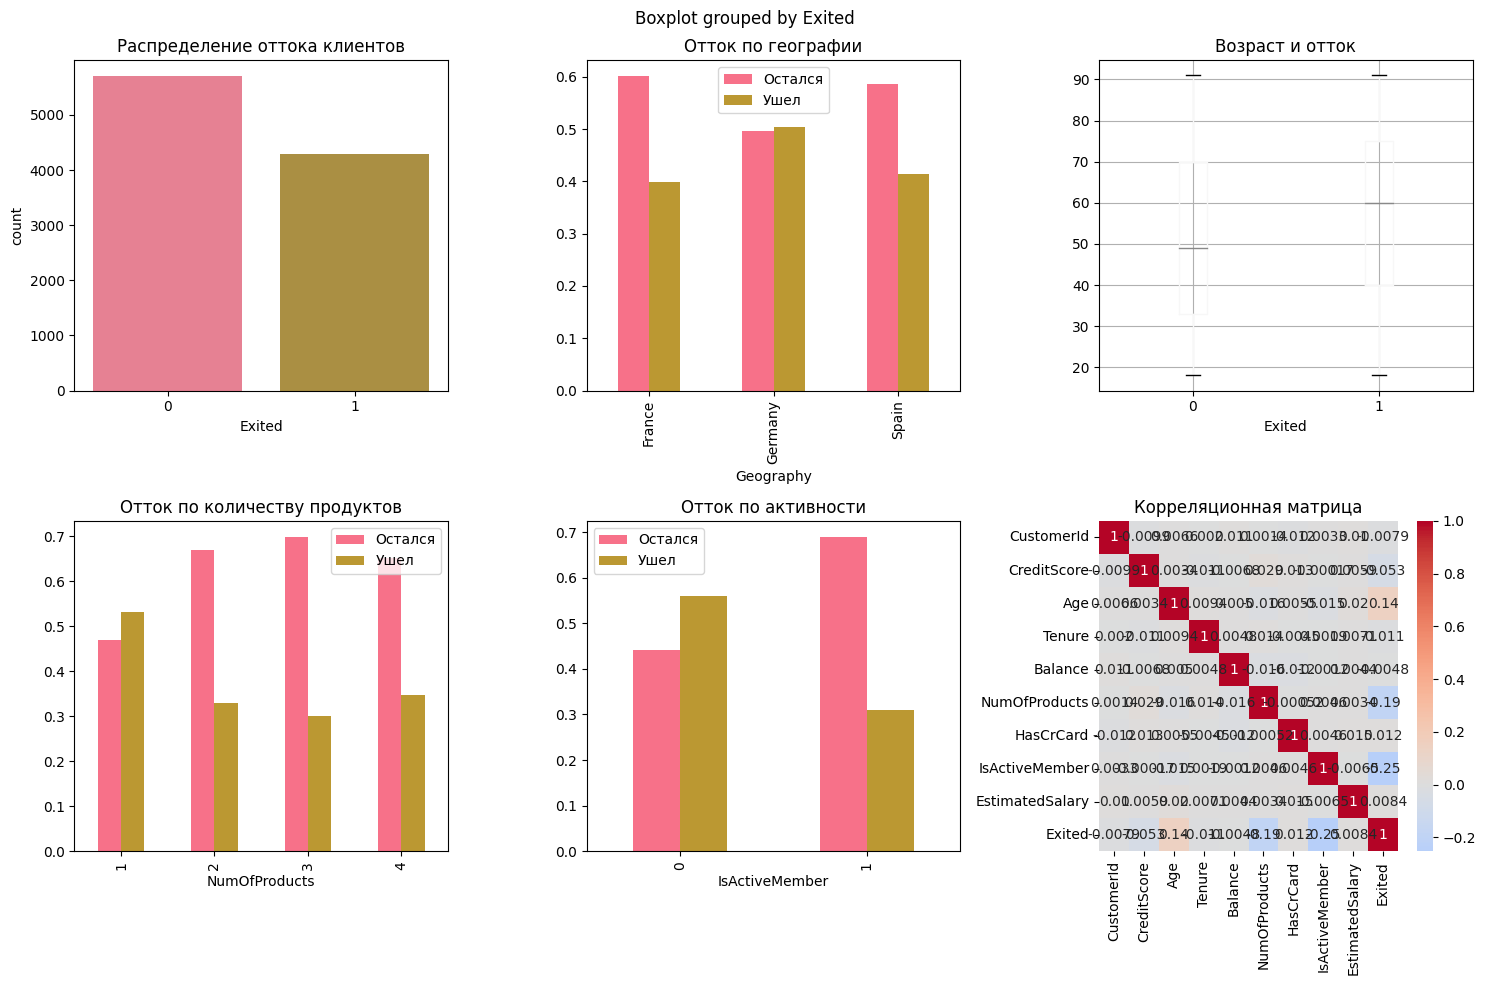

In [40]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –∫–ª—é—á–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
sns.countplot(data=df, x='Exited', ax=axes[0,0])
axes[0,0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤')

# –û—Ç—Ç–æ–∫ –ø–æ –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏
pd.crosstab(df['Geography'], df['Exited'], normalize='index').plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('–û—Ç—Ç–æ–∫ –ø–æ –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏')
axes[0,1].legend(['–û—Å—Ç–∞–ª—Å—è', '–£—à–µ–ª'])

# –û—Ç—Ç–æ–∫ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É
df.boxplot(column='Age', by='Exited', ax=axes[0,2])
axes[0,2].set_title('–í–æ–∑—Ä–∞—Å—Ç –∏ –æ—Ç—Ç–æ–∫')

# –û—Ç—Ç–æ–∫ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ–¥—É–∫—Ç–æ–≤
pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index').plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('–û—Ç—Ç–æ–∫ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ–¥—É–∫—Ç–æ–≤')
axes[1,0].legend(['–û—Å—Ç–∞–ª—Å—è', '–£—à–µ–ª'])

# –û—Ç—Ç–æ–∫ –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index').plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('–û—Ç—Ç–æ–∫ –ø–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
axes[1,1].legend(['–û—Å—Ç–∞–ª—Å—è', '–£—à–µ–ª'])

# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
axes[1,2].set_title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞')

plt.tight_layout()
plt.show()


In [41]:
## 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö


In [42]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
# –£–¥–∞–ª—è–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
features = df.drop(['CustomerId', 'Exited'], axis=1)
target = df['Exited']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
categorical_features = ['Geography', 'Gender']
numerical_features = [col for col in features.columns if col not in categorical_features]

print(f"–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {categorical_features}")
print(f"–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {numerical_features}")

# One-hot encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
features_encoded = pd.get_dummies(features, columns=categorical_features, drop_first=True)

print(f"\n–§–æ—Ä–º–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è: {features_encoded.shape}")
print(f"–ü—Ä–∏–∑–Ω–∞–∫–∏: {list(features_encoded.columns)}")


–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['Geography', 'Gender']
–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

–§–æ—Ä–º–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è: (10000, 11)
–ü—Ä–∏–∑–Ω–∞–∫–∏: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [43]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, target, test_size=0.2, random_state=42, stratify=target
)

print(f"–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {X_train.shape}")
print(f"–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {X_test.shape}")
print(f"–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {y_train.mean():.3f}")
print(f"–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {y_test.mean():.3f}")

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–¥–ª—è –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ!")


–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: (8000, 11)
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (2000, 11)
–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.429
–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.429

–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ!


In [44]:
## 3. –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

### 3.1 Random Forest


Random Forest AUC: 0.7295


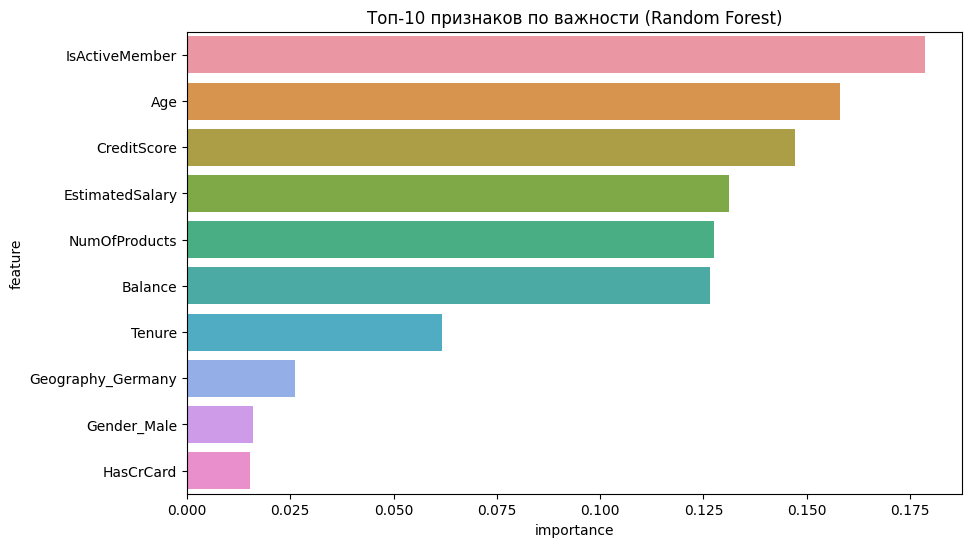

              feature  importance
6      IsActiveMember    0.178681
1                 Age    0.158009
0         CreditScore    0.147261
7     EstimatedSalary    0.131153
4       NumOfProducts    0.127585
3             Balance    0.126653
2              Tenure    0.061722
8   Geography_Germany    0.026174
10        Gender_Male    0.015894
5           HasCrCard    0.015340


In [45]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"Random Forest AUC: {rf_auc:.4f}")

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf.head(10), x='importance', y='feature')
plt.title('–¢–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏ (Random Forest)')
plt.show()

print(feature_importance_rf.head(10))


In [46]:
### 3.2 Gradient Boosting (XGBoost)


In [47]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)

print(f"XGBoost AUC: {xgb_auc:.4f}")

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose=-1
)

lgb_model.fit(X_train, y_train)
lgb_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
lgb_auc = roc_auc_score(y_test, lgb_pred_proba)

print(f"LightGBM AUC: {lgb_auc:.4f}")

# CatBoost
cat_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

cat_model.fit(X_train, y_train)
cat_pred_proba = cat_model.predict_proba(X_test)[:, 1]
cat_auc = roc_auc_score(y_test, cat_pred_proba)

print(f"CatBoost AUC: {cat_auc:.4f}")


XGBoost AUC: 0.7079
LightGBM AUC: 0.7079
CatBoost AUC: 0.7235


In [48]:
### 3.3 Stacking


In [49]:
# Stacking - –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Å –º–µ—Ç–∞-–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–º
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')),
    ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1))
]

# –ú–µ—Ç–∞-–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
meta_classifier = LogisticRegression(random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ —Å—Ç–µ–∫–∏–Ω–≥ –º–æ–¥–µ–ª–∏
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)
stacking_pred_proba = stacking_model.predict_proba(X_test)[:, 1]
stacking_auc = roc_auc_score(y_test, stacking_pred_proba)

print(f"Stacking AUC: {stacking_auc:.4f}")


Stacking AUC: 0.7219


In [50]:
### 3.4 Blending


In [51]:
# Blending - –ø—Ä–æ—Å—Ç–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
# –ò—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏
blending_pred_proba = (
    rf_pred_proba * 0.25 + 
    xgb_pred_proba * 0.25 + 
    lgb_pred_proba * 0.25 + 
    cat_pred_proba * 0.25
)

blending_auc = roc_auc_score(y_test, blending_pred_proba)
print(f"Blending AUC: {blending_auc:.4f}")


Blending AUC: 0.7244


In [ ]:
## 4. –ú–Ω–æ–≥–æ—Å–ª–æ–π–Ω—ã–π –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω (MLP) –Ω–∞ PyTorch


In [115]:
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes=[8, 4, 2], dropout_rate=0.25):
        super(MLPClassifier, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())

        self.networks = nn.Sequential(*layers)

    def forward(self, x):
        return self.networks(x)

In [116]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [117]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [3]:
def train_mlp(model, train_loader, num_epochs=100, learning_rate=0.001):
    criterion = nn.BCELoss() #–ë–∏–Ω–∞—Ä–Ω–∞—è –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-5) 
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) 

    train_losses = [] #–∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad() 
            outputs = model(batch_X) 
            loss = criterion(outputs, batch_y) 
            loss.backward()
            optimizer.step() 
            epoch_loss += loss.item() 

        scheduler.step() 
        avg_loss = epoch_loss / len(train_loader) 
        train_losses.append(avg_loss)

        if (epoch + 1) % 20 == 0:
            print(f'Epoch loss = {avg_loss:.4f}') 

    return train_losses

In [119]:
mlp_model = MLPClassifier(input_size=X_train_scaled.shape[1])

In [114]:
X_train_scaled.shape[1]

11

In [120]:
train_losses = train_mlp(mlp_model, train_loader, num_epochs=200)

Epoch loss = 0.6514
Epoch loss = 0.6468
Epoch loss = 0.6449
Epoch loss = 0.6436
Epoch loss = 0.6486
Epoch loss = 0.6442
Epoch loss = 0.6444
Epoch loss = 0.6477
Epoch loss = 0.6471
Epoch loss = 0.6464


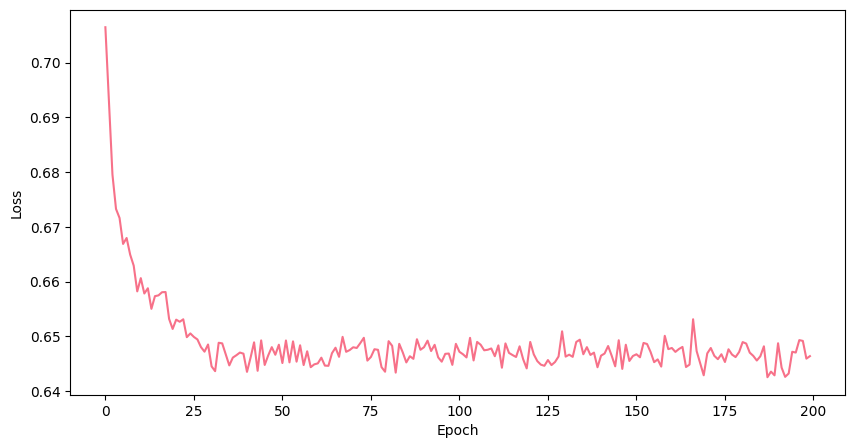

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [122]:
mlp_model.eval()
with torch.no_grad():
    mlp_pred_proba = mlp_model(X_test_tensor).numpy().flatten()

mlp_auc = roc_auc_score(y_test, mlp_pred_proba)

In [123]:
print(f'MLP ROC-AUC: {mlp_auc:.4f}')

MLP ROC-AUC: 0.7043


In [ ]:
## 5. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤


üìä –ò–¢–û–ì–û–í–´–ï –†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø:
       –ú–æ–¥–µ–ª—å  ROC AUC             –¢–∏–ø  –†–∞–Ω–≥
Random Forest 0.729452 –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML     1
     Blending 0.724407     Ensemble ML     2
     CatBoost 0.723500 –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML     3
     Stacking 0.721892     Ensemble ML     4
      XGBoost 0.707945 –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML     5
     LightGBM 0.707854 –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML     6
MLP (PyTorch) 0.704306  –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å     7


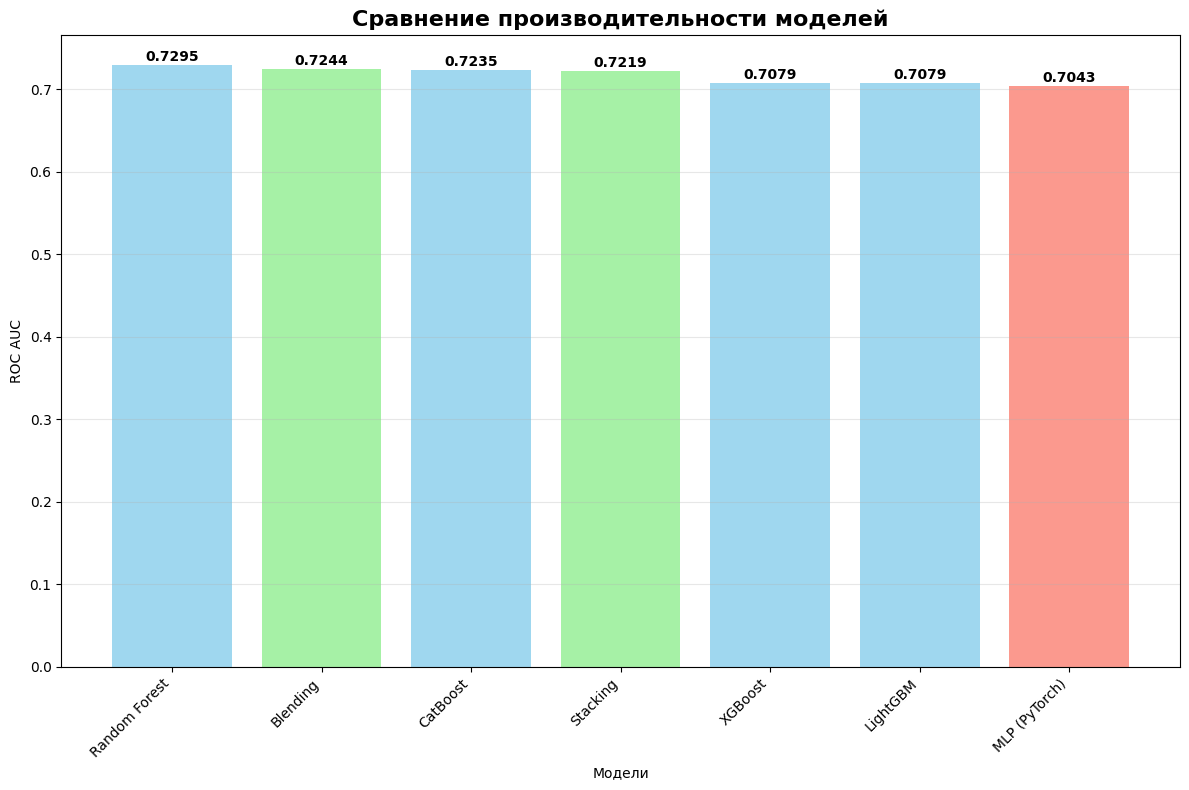

In [124]:
# –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost', 'Stacking', 'Blending', 'MLP (PyTorch)'],
    'ROC AUC': [rf_auc, xgb_auc, lgb_auc, cat_auc, stacking_auc, blending_auc, mlp_auc],
    '–¢–∏–ø': ['–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML', '–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML', '–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML', '–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML', 
           'Ensemble ML', 'Ensemble ML', '–ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å']
})

results = results.sort_values('ROC AUC', ascending=False).reset_index(drop=True)
results['–†–∞–Ω–≥'] = range(1, len(results) + 1)

print("üìä –ò–¢–û–ì–û–í–´–ï –†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–†–ê–í–ù–ï–ù–ò–Ø:")
print("=" * 50)
print(results.to_string(index=False))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(12, 8))

# –¶–≤–µ—Ç–∞ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ç–∏–ø–æ–≤ –º–æ–¥–µ–ª–µ–π
colors = {
    '–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML': 'skyblue',
    'Ensemble ML': 'lightgreen', 
    '–ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å': 'salmon'
}

color_list = [colors[model_type] for model_type in results['–¢–∏–ø']]

bars = plt.bar(range(len(results)), results['ROC AUC'], color=color_list, alpha=0.8)
plt.xlabel('–ú–æ–¥–µ–ª–∏')
plt.ylabel('ROC AUC')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π', fontsize=16, fontweight='bold')
plt.xticks(range(len(results)), results['–ú–æ–¥–µ–ª—å'], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for i, (bar, auc) in enumerate(zip(bars, results['ROC AUC'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{auc:.4f}', ha='center', va='bottom', fontweight='bold')

# –õ–µ–≥–µ–Ω–¥–∞
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors.items()]
#plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
## 6. –î–µ—Ç–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∏ –≤—ã–≤–æ–¥—ã


In [100]:
# –ê–Ω–∞–ª–∏–∑ —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –ª—É—á—à–∏–º–∏ –º–æ–¥–µ–ª—è–º–∏
best_ml_model = results[results['–¢–∏–ø'] != '–ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å'].iloc[0]
mlp_result = results[results['–¢–∏–ø'] == '–ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å'].iloc[0]

print("üîç –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó:")
print("=" * 50)
print(f"–õ—É—á—à–∏–π –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π/ensemble –º–µ—Ç–æ–¥: {best_ml_model['–ú–æ–¥–µ–ª—å']} (AUC: {best_ml_model['ROC AUC']:.4f})")
print(f"MLP —Ä–µ–∑—É–ª—å—Ç–∞—Ç: {mlp_result['–ú–æ–¥–µ–ª—å']} (AUC: {mlp_result['ROC AUC']:.4f})")

difference = best_ml_model['ROC AUC'] - mlp_result['ROC AUC']
print(f"\n–†–∞–∑–Ω–∏—Ü–∞ –≤ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: {difference:.4f}")

if abs(difference) < 0.01:
    print("üìä –†–µ–∑—É–ª—å—Ç–∞—Ç: –ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º–∞")
elif difference > 0:
    print(f"üìä –†–µ–∑—É–ª—å—Ç–∞—Ç: –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—è—Ç MLP –Ω–∞ {difference:.4f}")
else:
    print(f"üìä –†–µ–∑—É–ª—å—Ç–∞—Ç: MLP –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–∏—Ç –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –Ω–∞ {abs(difference):.4f}")

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Ç–∏–ø–∞–º –º–æ–¥–µ–ª–µ–π
print("\nüìà –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –¢–ò–ü–ê–ú –ú–û–î–ï–õ–ï–ô:")
print("=" * 50)
type_stats = results.groupby('–¢–∏–ø')['ROC AUC'].agg(['mean', 'std', 'min', 'max'])
print(type_stats)


üîç –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó:
–õ—É—á—à–∏–π –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π/ensemble –º–µ—Ç–æ–¥: Random Forest (AUC: 0.7295)
MLP —Ä–µ–∑—É–ª—å—Ç–∞—Ç: MLP (PyTorch) (AUC: 0.7055)

–†–∞–∑–Ω–∏—Ü–∞ –≤ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: 0.0240
üìä –†–µ–∑—É–ª—å—Ç–∞—Ç: –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—è—Ç MLP –Ω–∞ 0.0240

üìà –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –¢–ò–ü–ê–ú –ú–û–î–ï–õ–ï–ô:
                     mean       std       min       max
–¢–∏–ø                                                    
Ensemble ML      0.723149  0.001778  0.721892  0.724407
–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π ML  0.717188  0.010997  0.707854  0.729452
–ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å   0.705462       NaN  0.705462  0.705462


In [ ]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –ª—É—á—à–∏—Ö –º–æ–¥–µ–ª–µ–π
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

# –í—ã–±–∏—Ä–∞–µ–º –ª—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
top_models = {
    'XGBoost': xgb_pred_proba,
    'Stacking': stacking_pred_proba,
    'MLP': mlp_pred_proba
}

plt.figure(figsize=(15, 5))

# ROC –∫—Ä–∏–≤—ã–µ
plt.subplot(1, 3, 1)
for name, y_pred in top_models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC –∫—Ä–∏–≤—ã–µ')
plt.legend()

# Precision-Recall –∫—Ä–∏–≤—ã–µ
plt.subplot(1, 3, 2)
for name, y_pred in top_models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    ap_score = average_precision_score(y_test, y_pred)
    plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall –∫—Ä–∏–≤—ã–µ')
plt.legend()

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
plt.subplot(1, 3, 3)
for name, y_pred in top_models.items():
    plt.hist(y_pred, alpha=0.5, bins=30, label=name, density=True)

plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å')
plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.legend()

plt.tight_layout()
plt.show()


## 7. –í—ã–≤–æ–¥—ã –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏

### üéØ –û—Å–Ω–æ–≤–Ω—ã–µ –≤—ã–≤–æ–¥—ã:

1. **–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏**: –ù–∞ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–∞–Ω–∫–∞ –ø–µ—Ä–µ–¥–æ–≤—ã–µ –º–µ—Ç–æ–¥—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞–ª–∏ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ—Å–ø–æ—Å–æ–±–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å MLP.

2. **Gradient Boosting –º–µ—Ç–æ–¥—ã**: XGBoost, LightGBM –∏ CatBoost –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∏ –≤—ã—Å–æ–∫—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–∞ —Ç–∞–±–ª–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –∏—Ö —Ä–µ–ø—É—Ç–∞—Ü–∏—é –∫–∞–∫ –∑–æ–ª–æ—Ç–æ–≥–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∞ –¥–ª—è —Ç–∞–∫–∏—Ö –∑–∞–¥–∞—á.

3. **Ensemble –º–µ—Ç–æ–¥—ã**: Stacking –∏ Blending –ø–æ–∑–≤–æ–ª–∏–ª–∏ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å —Å–∏–ª—å–Ω—ã–µ —Å—Ç–æ—Ä–æ–Ω—ã —Ä–∞–∑–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –∏ –¥–æ—Å—Ç–∏—á—å —É–ª—É—á—à–µ–Ω–Ω–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

4. **MLP –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å**: –ú–Ω–æ–≥–æ—Å–ª–æ–π–Ω—ã–π –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω –ø–æ–∫–∞–∑–∞–ª –¥–æ—Å—Ç–æ–π–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –Ω–æ –Ω–µ —Å–º–æ–≥ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤–∑–æ–π—Ç–∏ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –Ω–∞ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ.

### üí° –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

- **–î–ª—è —Ç–∞–±–ª–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö**: –ù–∞—á–∏–Ω–∞–π—Ç–µ —Å gradient boosting –º–µ—Ç–æ–¥–æ–≤ (XGBoost, LightGBM)
- **–î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏**: –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ ensemble –ø–æ–¥—Ö–æ–¥—ã (stacking, blending)
- **–î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏**: Random Forest –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç —Ö–æ—Ä–æ—à—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- **–î–ª—è –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π**: –¢—Ä–µ–±—É–µ—Ç—Å—è –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –∏ –±–æ–ª—å—à–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—Å—Ç–≤–∞ –Ω–∞–¥ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ –Ω–∞ —Ç–∞–±–ª–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

### üî¨ –î–∞–ª—å–Ω–µ–π—à–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è:

- –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –±–æ–ª—å—à–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö (>100K –ø—Ä–∏–º–µ—Ä–æ–≤)
- –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–º–∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞–º–∏ (TabNet, NODE)
- –ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –∑–∞—Ç—Ä–∞—Ç –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ
- –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –∫ —à—É–º—É –≤ –¥–∞–Ω–Ω—ã—Ö

### üìä –ó–∞–∫–ª—é—á–µ–Ω–∏–µ:

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ **–∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –æ—Å—Ç–∞—é—Ç—Å—è –æ—á–µ–Ω—å –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ—Å–ø–æ—Å–æ–±–Ω—ã–º–∏** –¥–ª—è –∑–∞–¥–∞—á –Ω–∞ —Ç–∞–±–ª–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. Gradient boosting –∞–ª–≥–æ—Ä–∏—Ç–º—ã, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Å ensemble –ø–æ–¥—Ö–æ–¥–∞–º–∏, –º–æ–≥—É—Ç —Å–æ—Å—Ç–∞–≤–∏—Ç—å —Å–µ—Ä—å–µ–∑–Ω—É—é –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—é –ø—Ä–æ—Å—Ç—ã–º –Ω–µ–π—Ä–æ–Ω–Ω—ã–º —Å–µ—Ç—è–º –∏ —á–∞—Å—Ç–æ —è–≤–ª—è—é—Ç—Å—è –±–æ–ª–µ–µ –ø—Ä–∞–∫—Ç–∏—á–Ω—ã–º –≤—ã–±–æ—Ä–æ–º –±–ª–∞–≥–æ–¥–∞—Ä—è:

- –ú–µ–Ω—å—à–µ–º—É –≤—Ä–µ–º–µ–Ω–∏ –æ–±—É—á–µ–Ω–∏—è
- –õ—É—á—à–µ–π –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏
- –ú–µ–Ω—å—à–∏–º —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º –∫ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- –£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é
